In [1]:
import numpy as np
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# load the data

In [2]:
X_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_train_1.npy')/255
X_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_test_1.npy')/255
Y_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_train_1.npy')
Y_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_test_1.npy')

# data augmentation


Adding small perturbations or changes to the training data can, on the one hand, increase the training data and thus improve the generalization ability of the model, and on the other hand, increase the noise data and thus enhance the robustness of the model.

In [3]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

## early stopping

In [4]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                     min_delta=0.0001,
                                     patience=10,
                                     mode="auto",
                                     verbose = 1)
]
#monitor=Data interface for monitoring
#val_loss，loss for validation data which is a common data interface
#patient：For the set monitor, the number of epochs that can be tolerated without improvement
#verbose：Whether to output more debugging information
#mode：only three situations{‘min’,’max’,’auto’}，represent whether monitor increse or decrease in normal situation

In [6]:
# define three metrics:recall,precision and f1 score for the training data
import tensorflow.keras.backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
#set the epoch,learning rate,batch size and the image size
EPOCHS = 5
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224,224))
image_size = 0
#directory_root = '/kaggle/input/vegnet-organized-dataset-of-cauliflower-disease'
width=224
height=224
depth=3
inputShape = (height, width, depth)
n_classes=15

In [11]:
#get the test accuracy and save the model
def Res_Plot_Test_Save(name):
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(X_test_1, Y_test_1)
    print(f"Test Accuracy: {scores[1]*100}")
    print("[INFO] Saving model")
    model.save(name)

# model

In [10]:
def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)
        
    fig = go.Figure()
        
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))
    
    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()

In [12]:

import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
#from kaggle_datasets import KaggleDatasets
from tensorflow.keras.applications import DenseNet121


#from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")

In [13]:
# def create_model():
import tensorflow as tf
model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
n_classes=15
model.add(Dense(n_classes))
model.add(Activation("softmax"))

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution

# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        1

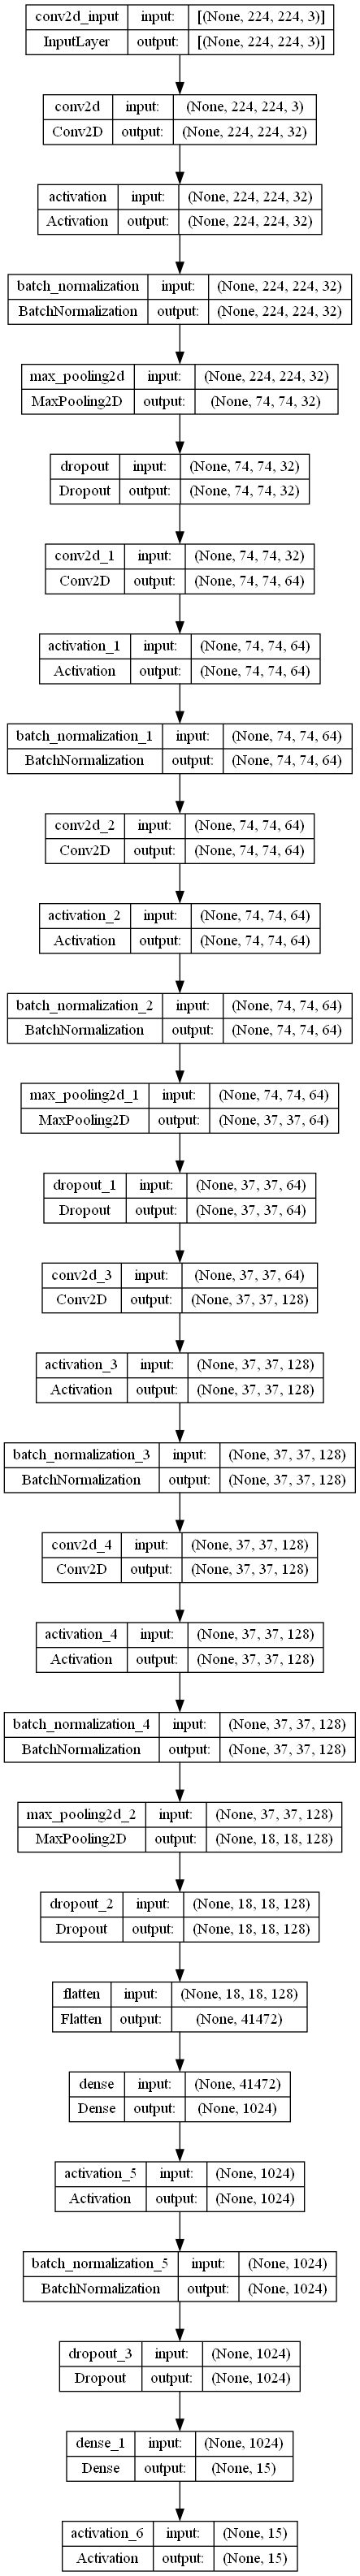

In [15]:
## Trying to visualise
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [16]:
# train the network
print("[INFO] training network...")
history = model.fit(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=1
    )

[INFO] training network...
73/73 [==============================] - 66s 859ms/step - loss: 0.6009 - accuracy: 0.2563 - f1_m: 0.1171 - precision_m: 0.3939 - recall_m: 0.0703 - val_loss: 0.7406 - val_accuracy: 0.0626 - val_f1_m: 0.0060 - val_precision_m: 0.0351 - val_recall_m: 0.0033


display the training and validation output for each epoch under three metrics we defined before. Because of the limited computing power of the computer, here we only use two epochs. and get the results of running 100 epochs on the hpc.

In [22]:

from plotly.subplots import make_subplots

display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

In [25]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_1, Y_test_1, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

Accuracy: 0.09813874959945679 
Loss:0.6932046413421631 
F1_score: 0.0 
Precision: 0.0 
Recall: 0.0


## Predicting on a single image

In [28]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
          # gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [18]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
          #  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [34]:
label_binarizer=['Pepper__bell___Bacterial_spot','Pepper__bell___healthy',
 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight',
 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [32]:
label_binarizer[1]

'Pepper__bell___healthy'

C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3/Data/PlantVillage/Pepper__bell___Bacterial_spot/0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG
1/1 [==============================] - 0s 25ms/step


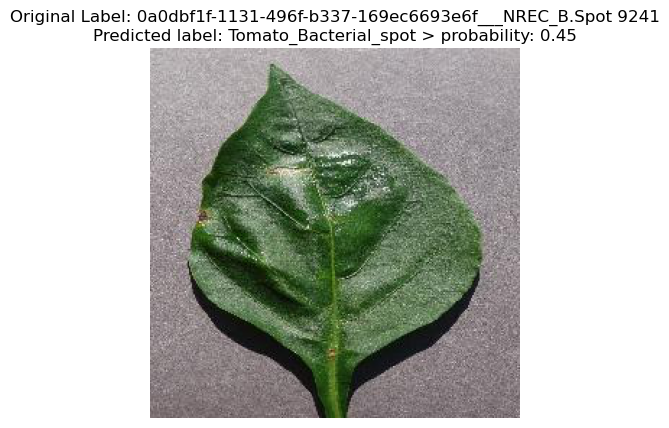

In [35]:
from random import randint

image_dir= "C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3/Data/PlantVillage/Pepper__bell___Bacterial_spot/0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG"
print(image_dir)
index1 = image_dir.rfind('/')
index2 = image_dir.rfind('.')
Image1 = plt.imread(image_dir)

im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
result=model.predict(npp_image)
itemindex = np.where(result==np.max(result))
# print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])
#plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])
plt.show()

# inception V3

Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for GoogLeNet. It uses two 3x3 convolution operations to improve computational speed. Although this seems unreasonable, a 5x5 convolution is 2.78 times more expensive than a 3x3 convolution. So stacking two 3x3 convolutions infact leads to a hike in performance.

In [16]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
# model = tf.keras.backend.clear_session()


# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=inputShape)
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m]) 
# model.summary()

In [17]:
# train the network
print("[INFO] training INCEPTION network...")
history = model.fit(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=5
    )

[INFO] training INCEPTION network...
Epoch 1/5
73/73 [==============================] - 119s 2s/step - loss: 0.1972 - accuracy: 0.4195 - f1_m: 0.2888 - precision_m: 0.5434 - recall_m: 0.2113 - val_loss: 0.1383 - val_accuracy: 0.5651 - val_f1_m: 0.5235 - val_precision_m: 0.7116 - val_recall_m: 0.4179
Epoch 2/5
73/73 [==============================] - 139s 2s/step - loss: 0.1200 - accuracy: 0.6625 - f1_m: 0.6549 - precision_m: 0.7940 - recall_m: 0.5614 - val_loss: 0.1230 - val_accuracy: 0.6328 - val_f1_m: 0.6345 - val_precision_m: 0.7750 - val_recall_m: 0.5398
Epoch 3/5
73/73 [==============================] - 133s 2s/step - loss: 0.1027 - accuracy: 0.7145 - f1_m: 0.7064 - precision_m: 0.7951 - recall_m: 0.6371 - val_loss: 0.1089 - val_accuracy: 0.6802 - val_f1_m: 0.6762 - val_precision_m: 0.7716 - val_recall_m: 0.6039
Epoch 4/5
73/73 [==============================] - 129s 2s/step - loss: 0.0902 - accuracy: 0.7424 - f1_m: 0.7460 - precision_m: 0.8122 - recall_m: 0.6914 - val_loss: 0.104

In [18]:
display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

In [19]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_1, Y_test_1, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

Accuracy: 0.6971235275268555 
Loss:0.10055771470069885 
F1_score: 0.7101378440856934 
Precision: 0.7582329511642456 
Recall: 0.668749988079071


In [40]:
Res_Plot_Test_Save('Inception_ModelV3_(Imagenet_Weights).h5')

[INFO] Calculating model accuracy
19/19 [==============================] - 9s 502ms/step - loss: 0.1334 - accuracy: 0.6091 - f1_m: 0.5373 - precision_m: 0.7673 - recall_m: 0.4172
Test Accuracy: 60.913705825805664
[INFO] Saving model


# Resnet Model

 In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Blocks. In this network, we use a technique called skip connections. The skip connection connects activations of a  layer to further layers by skipping some layers in between. This forms a residual block. Resnets are made by stacking these residual blocks together. 

In [20]:
from keras.models import Model
from keras import applications
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
model = tf.keras.backend.clear_session()

# Get the Resnet model so we can do transfer learning
base_model = ResNet50(weights= None, include_top=False, input_shape= (224,224,3))
                             
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m]) 
# model.summary()

In [22]:
# train the network
print("[INFO] training RESNET network...")
history = model.fit_generator(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=5
    )

[INFO] training RESNET network...
Epoch 1/5
73/73 [==============================] - 217s 3s/step - loss: 0.2642 - accuracy: 0.1928 - f1_m: 0.0742 - precision_m: 0.2788 - recall_m: 0.0449 - val_loss: 0.3398 - val_accuracy: 0.0660 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/5
73/73 [==============================] - 217s 3s/step - loss: 0.1857 - accuracy: 0.3718 - f1_m: 0.3002 - precision_m: 0.5895 - recall_m: 0.2070 - val_loss: 0.4057 - val_accuracy: 0.0457 - val_f1_m: 0.0285 - val_precision_m: 0.0381 - val_recall_m: 0.0230
Epoch 3/5
73/73 [==============================] - 224s 3s/step - loss: 0.1573 - accuracy: 0.4942 - f1_m: 0.4458 - precision_m: 0.6520 - recall_m: 0.3435 - val_loss: 0.4697 - val_accuracy: 0.0897 - val_f1_m: 0.0905 - val_precision_m: 0.0939 - val_recall_m: 0.0874
Epoch 4/5
73/73 [==============================] - 231s 3s/step - loss: 0.1369 - accuracy: 0.5762 - f1_m: 0.5579 - precision_m: 0.7070 - recall_m: 0.4638 - val_lo

In [23]:
display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

In [48]:
Res_Plot_Test_Save('ResNet_(Imagenet_Weights).h5')

[INFO] Calculating model accuracy
19/19 [==============================] - 13s 617ms/step - loss: 0.3345 - accuracy: 0.0592 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Test Accuracy: 5.922165885567665
[INFO] Saving model


# VGG16 Model

In [24]:
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
model = tf.keras.backend.clear_session()
# Get the vgg16 model so we can do transfer learning
base_model = vgg16.VGG16(weights= None, include_top=False, input_shape= (224,224,3))
# model= None                          
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m]) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
# train the network. It takes too much time to run one epoch, so I run it on HPC.
print("[INFO] training VGG16 network...")
history = model.fit(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=1
    )

[INFO] training VGG16 network...
12/73 [===>..........................] - ETA: 7:41 - loss: 1.4467 - accuracy: 0.0690 - f1_m: 0.0052 - precision_m: 0.0052 - recall_m: 0.0052

KeyboardInterrupt: 

In [ ]:
display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_1, Y_test_1, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

In [ ]:
Res_Plot_Test_Save('VGG16_(Imagenet_Weights).h5')